# Deep learing

## FNN

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout , GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

In [6]:
cols = ["G" , "C" , "B" , "A" , "Ia" , "Ib" , "Ic" , "Va" , "Vb" , "Vc"] 
# Ia" , "Ib" , "Ic" , "Va" , "Vb" , "Vc is Input : features
# G , C , B , A is OutPut : labels
df = pd.read_csv("../../classData.csv")
cols[4:]
# Step 1: Encode fault combinations into single-class labels
fault_map = {
    '0000': 0,  # No Fault
    '1001': 1,  # LG
    '0011': 2,  # LL
    '0110': 3 , # LL
    '1011': 4,  # LLG
    '0111': 5,  # LLL
    '1111': 6   # LLLG
}
df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [7]:
df['fault_type'] = df[['G', 'C', 'B', 'A']].astype(str).agg(''.join, axis=1)
# Map to single class label
df['fault_class'] = df['fault_type'].map(fault_map)
# Drop rows with unknown fault combinations


In [8]:
# Keep dropped rows (unknown fault types) in a separate DataFrame
df_unknown = df[~df['fault_type'].isin(fault_map.keys())].copy()

# Filter valid rows for training
df = df[df['fault_type'].isin(fault_map.keys())].copy()


In [9]:
df 

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type,fault_class
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001,1
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001,1
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001,1
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001,1
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0000,0
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0000,0
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0000,0
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0000,0


In [10]:
df_unknown

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type,fault_class


In [11]:
train , valid , test = np.split(df.sample(frac = 1) , [int(0.6 * len(df)) , int(0.8 * len(df))])
# train  60% |||||||||||||
# valid  20%  1234567890
# test 20%
test

c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type,fault_class
6183,0,0,0,0,-55.143378,96.111945,-44.337574,-0.514016,-0.025847,0.539862,0000,0
5205,1,1,1,1,-880.573612,377.335059,503.236289,-0.022689,0.042364,-0.019674,1111,6
6199,0,0,0,0,-64.486428,89.603386,-28.480788,-0.413102,-0.174646,0.587748,0000,0
3126,0,1,1,0,54.209175,-568.911763,517.219031,0.205024,0.031069,-0.236093,0110,3
5456,1,1,1,1,562.816481,63.021761,6.863071,0.192229,-0.492558,0.300329,1111,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3691,0,1,1,1,-865.095908,585.962104,281.237504,-0.011798,0.041151,-0.029353,0111,5
2971,0,1,1,0,-40.498894,784.478380,-741.470860,0.136708,-0.004891,-0.131817,0110,3
4971,1,1,1,1,794.880620,-731.873006,-63.009877,0.001265,-0.037265,0.036000,1111,6
7842,0,0,0,0,-70.120237,52.013561,15.234174,-0.038279,-0.493339,0.531617,0000,0


In [12]:
def scale_dataset(dataFrame):
    from tensorflow.keras.utils import to_categorical
    x = dataFrame[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].values
    # Get the fault class values from the dataFrame parameter (not the global df)
    y = dataFrame['fault_class'].values
    
    # Scale the input features
    scaler = StandardScaler() 
    x = scaler.fit_transform(x)

    # One-hot encode the target for categorical classification
    y_cat = to_categorical(y, num_classes=7)
    
    return x, y_cat  # Return the one-hot encoded y values

In [13]:
# Re-run these steps with the fixed function
X_train, Y_train = scale_dataset(train)
X_valid, Y_valid = scale_dataset(valid)
X_test, Y_test = scale_dataset(test)

X_train

array([[ 1.25779106, -1.8601511 ,  0.62284151, -0.02038476, -0.11019885,
         0.12993103],
       [-1.89208126,  0.77016339,  1.472434  , -0.06191187,  0.11217192,
        -0.05462961],
       [-0.17148759,  0.31337061, -0.16041547, -1.24038587, -0.75202465,
         1.92089321],
       ...,
       [ 1.63635684,  0.16688166, -0.02821615,  0.4673606 , -1.48181883,
         1.05083626],
       [-0.13220813,  0.21495135, -0.23144604, -1.25872136,  1.83966289,
        -0.66742273],
       [ 0.04802021,  0.05111479, -0.12577211,  1.77157642,  0.07151247,
        -1.73558789]])

In [14]:
X_train

array([[ 1.25779106, -1.8601511 ,  0.62284151, -0.02038476, -0.11019885,
         0.12993103],
       [-1.89208126,  0.77016339,  1.472434  , -0.06191187,  0.11217192,
        -0.05462961],
       [-0.17148759,  0.31337061, -0.16041547, -1.24038587, -0.75202465,
         1.92089321],
       ...,
       [ 1.63635684,  0.16688166, -0.02821615,  0.4673606 , -1.48181883,
         1.05083626],
       [-0.13220813,  0.21495135, -0.23144604, -1.25872136,  1.83966289,
        -0.66742273],
       [ 0.04802021,  0.05111479, -0.12577211,  1.77157642,  0.07151247,
        -1.73558789]])

In [15]:
Y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [16]:
# Step 6: Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')  # 7 classes for multiclass classification
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Step 7: Train the model
# Train the model
history = model.fit(
    X_train, Y_train, 
    epochs=20, 
    batch_size=32,
    validation_data=(X_valid, Y_valid)  # Use separate validation data instead of validation_split
)

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2843 - loss: 1.7840 - val_accuracy: 0.6291 - val_loss: 1.0858
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6560 - loss: 0.9747 - val_accuracy: 0.7513 - val_loss: 0.6321
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7372 - loss: 0.6412 - val_accuracy: 0.8098 - val_loss: 0.4912
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7865 - loss: 0.5142 - val_accuracy: 0.8174 - val_loss: 0.4278
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7958 - loss: 0.4548 - val_accuracy: 0.8104 - val_loss: 0.3916
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7993 - loss: 0.4177 - val_accuracy: 0.8314 - val_loss: 0.3673
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8021 - loss: 0.4099 - val_accuracy: 0.8416 - val_loss: 0.3551
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8004 - loss: 0.3934 - val_accuracy: 0.

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions on test data
y_pred = model.predict(X_test)

# Convert softmax probabilities to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded test labels back to class indices for comparison
y_test_classes = np.argmax(Y_test, axis=1)

# Print evaluation metrics
print(classification_report(y_test_classes, y_pred_classes))
print(confusion_matrix(y_test_classes, y_pred_classes))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       445
           1       0.91      1.00      0.95       243
           3       0.96      0.94      0.95       215
           4       0.96      0.96      0.96       224
           5       0.51      0.78      0.62       222
           6       0.47      0.17      0.25       224

    accuracy                           0.83      1573
   macro avg       0.80      0.81      0.79      1573
weighted avg       0.82      0.83      0.81      1573

[[443   2   0   0   0   0]
 [  0 242   0   1   0   0]
 [ 12   0 203   0   0   0]
 [  0  10   0 214   0   0]
 [  0   0   6   1 173  42]
 [  0  12   2   8 164  38]]


In [20]:
from tensorflow.keras.models import Sequential, save_model, load_model
model_path = 'Knn_model.h5'
save_model(model, model_path)
# print(f"Saved {model_type} model to {model_path}")

In [ ]:
def save_model(self, model_type):
        """
        Save a trained model to disk.
        
        Args:
            model_type (str): Type of model to save
        """
        if model_type not in self.models:
            raise ValueError(f"Model {model_type} not built yet. Call build_model first.")
        
        model_path = os.path.join(self.output_dir, f'{model_type}_model.h5')
        save_model(self.models[model_type], model_path)
        print(f"Saved {model_type} model to {model_path}")

## better Result


In [ ]:
#  1. Create a deeper, more complex model
model_improved = Sequential([
    Dense(128, activation='relu', input_shape=(6,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 2. Use a different optimizer with a lower learning rate
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

# 3. Add class weights to handle class imbalance
# Calculate class weights based on class frequencies
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get class indices from the one-hot encoded training labels
y_train_classes = np.argmax(Y_train, axis=1)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_classes),
    y=y_train_classes
)

# Convert to dictionary for Keras
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class weights:", class_weight_dict)

Class weights: {0: np.float64(0.5578424414478353), 1: np.float64(1.1627218934911243), 2: np.float64(1.3187919463087248), 3: np.float64(1.1358381502890174), 4: np.float64(1.1575846833578793), 5: np.float64(1.1837349397590362)}


In [ ]:
# 4. Compile with additional metrics
model_improved.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', 'AUC', 'Precision', 'Recall']
)

In [ ]:
# 5. Use callbacks for early stopping and learning rate reduction
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

In [ ]:
# 6. Train with more epochs and class weights
history = model_improved.fit(
    X_train, Y_train,
    epochs=50,  # Increase epochs, early stopping will prevent overfitting
    batch_size=32,
    validation_data=(X_valid, Y_valid),
    class_weight=class_weight_dict,  # Apply class weights
    callbacks=[early_stopping, lr_reduction],
    verbose=1
)

Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - AUC: 0.7436 - Precision: 0.5140 - Recall: 0.0354 - accuracy: 0.3419 - loss: 1.6283 - val_AUC: 0.9638 - val_Precision: 0.7877 - val_Recall: 0.5642 - val_accuracy: 0.6991 - val_loss: 0.6887 - learning_rate: 0.0010
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - AUC: 0.9545 - Precision: 0.7523 - Recall: 0.5313 - accuracy: 0.6773 - loss: 0.7363 - val_AUC: 0.9786 - val_Precision: 0.8041 - val_Recall: 0.7156 - val_accuracy: 0.7697 - val_loss: 0.4871 - learning_rate: 0.0010
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - AUC: 0.9740 - Precision: 0.8098 - Recall: 0.6913 - accuracy: 0.7573 - loss: 0.5468 - val_AUC: 0.9843 - val_Precision: 0.8469 - val_Recall: 0.7602 - val_accuracy: 0.8066 - val_loss: 0.4103 - learning_rate: 0.0010
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - AUC: 0.9782 - Precision: 0.8106 - Recall: 0.7171 - accuracy: 0.7642 - loss: 0.4953 - val_AUC: 0.9868 - val_Precision: 0.8349 - val_Recall: 0.785

In [ ]:
# 7. Evaluate the improved model
y_pred = model_improved.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(Y_test, axis=1)

print("\nImproved Model Evaluation:")
print(classification_report(y_test_classes, y_pred_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

Improved Model Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       477
           1       0.94      0.99      0.96       208
           3       0.98      0.99      0.98       198
           4       1.00      0.95      0.97       226
           5       0.49      0.58      0.53       214
           6       0.57      0.48      0.52       250

    accuracy                           0.85      1573
   macro avg       0.83      0.83      0.83      1573
weighted avg       0.85      0.85      0.85      1573

Confusion Matrix:
[[473   0   4   0   0   0]
 [  1 206   0   1   0   0]
 [  1   0 196   0   1   0]
 [  1  10   0 215   0   0]
 [  0   0   0   0 124  90]
 [  0   4   0   0 126 120]]


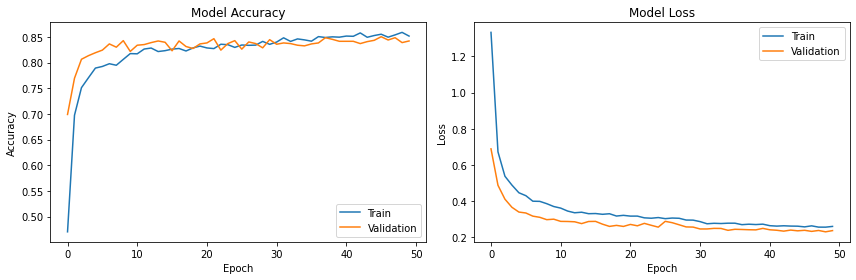

In [ ]:
# 8. Visualize training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
# 1. SMOTE: Synthetic Minority Over-sampling Technique
# This will help with the class imbalance problem, particularly for class 6
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

def apply_smote_balancing():
    # Get the class indices from one-hot encoded labels
    y_train_classes = np.argmax(Y_train, axis=1)
    
    # Apply SMOTE to generate synthetic samples for minority classes
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train_classes)
    
    # Convert back to one-hot encoding
    from tensorflow.keras.utils import to_categorical
    y_resampled_cat = to_categorical(y_resampled, num_classes=7)
    
    print(f"Original shape: {X_train.shape}, Resampled shape: {X_resampled.shape}")
    print("Class distribution before SMOTE:", np.bincount(y_train_classes))
    print("Class distribution after SMOTE:", np.bincount(y_resampled))
    
    return X_resampled, y_resampled_cat


In [ ]:

# 2. Focal Loss - To focus more on hard-to-classify examples like class 6
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        
        epsilon = K.epsilon()
        pt_1 = K.clip(pt_1, epsilon, 1. - epsilon)
        pt_0 = K.clip(pt_0, epsilon, 1. - epsilon)
        
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - \
               K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss_fixed


In [ ]:

# 3. Feature importance analysis and selection
from sklearn.feature_selection import SelectKBest, f_classif

def analyze_feature_importance(X, y, feature_names=None):
    # Convert one-hot encoded labels to class indices if needed
    if len(y.shape) > 1 and y.shape[1] > 1:
        y = np.argmax(y, axis=1)
    
    # Select k best features
    selector = SelectKBest(f_classif, k='all')
    selector.fit(X, y)
    
    # Get scores
    scores = selector.scores_
    
    # If feature names are provided, display them with scores
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(X.shape[1])]
    
    # Create dataframe of features and their scores
    import pandas as pd
    feature_scores = pd.DataFrame({
        'Feature': feature_names,
        'Score': scores
    })
    
    # Sort by score
    feature_scores = feature_scores.sort_values('Score', ascending=False)
    print(feature_scores)
    
    return feature_scores, selector


In [ ]:

# 4. Advanced model with attention mechanism
from tensorflow.keras.layers import Layer, Dense, Dropout, InputSpec, Input
from tensorflow.keras.models import Model

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(AttentionLayer, self).build(input_shape)
    
    def call(self, x):
        et = K.squeeze(K.tanh(K.dot(x, self.W) + self.b), axis=-1)
        at = K.softmax(et)
        at = K.expand_dims(at, axis=-1)
        output = x * at
        return K.sum(output, axis=1)
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

def create_attention_model(input_shape):
    inputs = Input(shape=(input_shape,))
    
    # First dense block
    x = Dense(128, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    
    # Reshape for attention
    reshaped = tf.keras.layers.Reshape((4, 32))(x)
    
    # Apply attention
    attention_output = AttentionLayer()(reshaped)
    
    # Additional dense layers
    x = Dense(64, activation='relu')(attention_output)
    x = Dropout(0.3)(x)
    
    # Output layer
    outputs = Dense(7, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss=focal_loss(gamma=2.0, alpha=0.25),
        metrics=['accuracy', 'AUC', 'Precision', 'Recall']
    )
    
    return model


In [ ]:

# 5. Hard example mining - focus training on the hardest examples
def train_with_hard_example_mining(model, X_train, Y_train, X_valid, Y_valid, epochs=50):
    batch_size = 32
    n_samples = X_train.shape[0]
    n_batches = n_samples // batch_size
    
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        
        # Calculate loss for each sample
        sample_losses = []
        for i in range(n_samples):
            x_sample = X_train[i:i+1]
            y_sample = Y_train[i:i+1]
            loss = model.test_on_batch(x_sample, y_sample)[0]
            sample_losses.append((i, loss))
        
        # Sort samples by loss (hardest examples first)
        sample_losses.sort(key=lambda x: x[1], reverse=True)
        
        # Take the top 50% hardest examples
        hard_indices = [x[0] for x in sample_losses[:n_samples//2]]
        
        # Train on hard examples
        X_hard = X_train[hard_indices]
        Y_hard = Y_train[hard_indices]
        
        model.fit(
            X_hard, Y_hard,
            epochs=1,
            batch_size=batch_size,
            verbose=0
        )
        
        # Evaluate on validation set
        val_loss, val_acc = model.evaluate(X_valid, Y_valid, verbose=0)
        print(f"Validation loss: {val_loss:.4f}, accuracy: {val_acc:.4f}")
    
    return model


In [ ]:

# 6. Multi-stage training: First train on all data, then fine-tune on problem classes
def multi_stage_training():
    # First stage: Train on all data
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(7, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    model.fit(
        X_train, Y_train,
        epochs=25,
        batch_size=32,
        validation_data=(X_valid, Y_valid),
        verbose=0
    )
    
    # Second stage: Focus on problem classes (5 and 6)
    y_train_classes = np.argmax(Y_train, axis=1)
    problem_indices = np.where((y_train_classes == 5) | (y_train_classes == 6))[0]
    
    # Also include some samples from other classes to prevent forgetting
    other_indices = np.where((y_train_classes != 5) & (y_train_classes != 6))[0]
    np.random.shuffle(other_indices)
    selected_other = other_indices[:len(problem_indices)]
    
    fine_tune_indices = np.concatenate([problem_indices, selected_other])
    X_fine_tune = X_train[fine_tune_indices]
    Y_fine_tune = Y_train[fine_tune_indices]
    
    # Fine-tune with a very low learning rate
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    model.fit(
        X_fine_tune, Y_fine_tune,
        epochs=15,
        batch_size=32,
        validation_data=(X_valid, Y_valid),
        verbose=0
    )
    
    return model


In [ ]:

# 7. Custom Metrics for Class 6
class ClassSixRecall(tf.keras.metrics.Metric):
    def __init__(self, name='class_six_recall', **kwargs):
        super(ClassSixRecall, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.false_negatives = self.add_weight(name='fn', initializer='zeros')
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.argmax(y_true, axis=1)
        y_pred = tf.argmax(y_pred, axis=1)
        
        # Find class 6 samples
        mask = tf.equal(y_true, 6)
        
        # Calculate true positives for class 6
        tp = tf.cast(tf.logical_and(mask, tf.equal(y_pred, 6)), tf.float32)
        self.true_positives.assign_add(tf.reduce_sum(tp))
        
        # Calculate false negatives for class 6
        fn = tf.cast(tf.logical_and(mask, tf.not_equal(y_pred, 6)), tf.float32)
        self.false_negatives.assign_add(tf.reduce_sum(fn))
    
    def result(self):
        return self.true_positives / (self.true_positives + self.false_negatives + K.epsilon())
    
    def reset_state(self):
        self.true_positives.assign(0)
        self.false_negatives.assign(0)


In [ ]:

# 8. Decision boundary analysis for classes 5 and 6
def analyze_decision_boundaries():
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt
    
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(Y_test, axis=1)
    
    # Find misclassifications between classes 5 and 6
    misclassified = []
    for i in range(len(y_test_classes)):
        if (y_test_classes[i] == 6 and y_pred_classes[i] == 5) or \
           (y_test_classes[i] == 5 and y_pred_classes[i] == 6):
            misclassified.append(i)
    
    # Get class 5 and 6 indices
    class5_indices = np.where(y_test_classes == 5)[0]
    class6_indices = np.where(y_test_classes == 6)[0]
    
    # Combine indices
    analysis_indices = np.concatenate([class5_indices, class6_indices])
    
    # Get features and labels for analysis
    X_analysis = X_test[analysis_indices]
    y_analysis = y_test_classes[analysis_indices]
    
    # Apply t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_analysis)
    
    # Plot
    plt.figure(figsize=(10, 8))
    for i, c in zip([5, 6], ['blue', 'red']):
        idx = np.where(y_analysis == i)
        plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], c=c, label=f'Class {i}')
    
    # Highlight misclassified points
    mis_idx = [list(analysis_indices).index(i) for i in misclassified if i in analysis_indices]
    plt.scatter(X_tsne[mis_idx, 0], X_tsne[mis_idx, 1], c='yellow', marker='x', s=100, label='Misclassified')
    
    plt.legend()
    plt.title('t-SNE visualization of classes 5 and 6')
    plt.show()
    
    return X_analysis, y_analysis, misclassified

# Example of how to use these methods:
# 1. First, balance the training data with SMOTE
X_resampled, Y_resampled = apply_smote_balancing()

# 2. Train an advanced model with balanced data and focal loss
input_shape = X_resampled.shape[1]
advanced_model = create_attention_model(input_shape)

# 3. Train with early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

history = advanced_model.fit(
    X_resampled, Y_resampled,
    epochs=50,
    batch_size=32,
    validation_data=(X_valid, Y_valid),
    callbacks=[early_stopping, lr_reduction],
    verbose=1
)


Original shape: (4716, 6), Resampled shape: (8454, 6)
Class distribution before SMOTE: [1409  676    0  596  692  679  664]
Class distribution after SMOTE: [1409 1409    0 1409 1409 1409 1409]
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - AUC: 0.7444 - Precision: 0.4088 - Recall: 0.0072 - accuracy: 0.3209 - loss: 0.0436 - val_AUC: 0.9647 - val_Precision: 1.0000 - val_Recall: 0.1991 - val_accuracy: 0.7322 - val_loss: 0.0183 - learning_rate: 0.0010
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - AUC: 0.9458 - Precision: 0.8759 - Recall: 0.2436 - accuracy: 0.6574 - loss: 0.0209 - val_AUC: 0.9797 - val_Precision: 0.9928 - val_Recall: 0.4389 - val_accuracy: 0.8041 - val_loss: 0.0135 - learning_rate: 0.0010
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - AUC: 0.9649 - Precision: 0.9050 - Recall: 0.4031 - accuracy: 0.7069 - loss: 0.0168 - val_AUC: 0.9844 - val_Precision: 0.9418 - val_Recall: 0.5770 - val_accuracy: 0.8104 - val_loss: 0.0116 - learning_rate: 0.0010
Epoch

In [ ]:

# 4. Evaluate the advanced model
y_pred = advanced_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(Y_test, axis=1)

print("\nAdvanced Model Evaluation:")
print(classification_report(y_test_classes, y_pred_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step

Advanced Model Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       477
           1       0.97      0.98      0.97       208
           3       0.99      0.99      0.99       198
           4       0.99      0.96      0.98       226
           5       0.79      0.10      0.18       214
           6       0.56      0.98      0.71       250

    accuracy                           0.87      1573
   macro avg       0.88      0.84      0.81      1573
weighted avg       0.89      0.87      0.83      1573

Confusion Matrix:
[[477   0   0   0   0   0]
 [  2 203   0   2   0   1]
 [  1   0 197   0   0   0]
 [  0   7   1 218   0   0]
 [  0   0   1   0  22 191]
 [  0   0   0   0   6 244]]


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])


c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_valid, Y_valid)
)
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # if one-hot encoded
y_true = Y_test.argmax(axis=1)          # or just use Y_test if sparse

print(classification_report(y_true, y_pred_classes))

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3497 - loss: 1.6338 - val_accuracy: 0.6667 - val_loss: 0.9094
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6789 - loss: 0.8568 - val_accuracy: 0.7894 - val_loss: 0.5695
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7718 - loss: 0.5865 - val_accuracy: 0.8034 - val_loss: 0.4614
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7804 - loss: 0.4890 - val_accuracy: 0.8276 - val_loss: 0.4100
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8055 - loss: 0.4402 - val_accuracy: 0.8276 - val_loss: 0.3783
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8141 - loss: 0.4133 - val_accuracy: 0.8359 - val_loss: 0.3547
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8109 - loss: 0.3901 - val_accuracy: 0.8238 - val_loss: 0.3438
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8148 - loss: 0.3682 - val_accuracy

In [ ]:
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(6, 1)),  # Use Conv2D for images
    MaxPooling1D(2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])


c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_valid, Y_valid)
)
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # if one-hot encoded
y_true = Y_test.argmax(axis=1)          # or just use Y_test if sparse

print(classification_report(y_true, y_pred_classes))

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.4358 - loss: 1.5740 - val_accuracy: 0.6253 - val_loss: 0.8674
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6758 - loss: 0.7849 - val_accuracy: 0.7087 - val_loss: 0.6419
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7315 - loss: 0.6271 - val_accuracy: 0.7621 - val_loss: 0.5387
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7661 - loss: 0.5253 - val_accuracy: 0.7767 - val_loss: 0.4825
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7846 - loss: 0.4779 - val_accuracy: 0.8015 - val_loss: 0.4320
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7994 - loss: 0.4334 - val_accuracy: 0.7977 - val_loss: 0.4064
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8038 - loss: 0.4138 - val_accuracy: 0.7971 - val_loss: 0.3880
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8158 - loss: 0.3913 - val_accur

In [ ]:
from keras.layers import LSTM, GRU
# For time series data:
# X_train.shape == (samples, timesteps, features)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
timesteps = X_train.shape[1]
features = X_train.shape[2]

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_valid, Y_valid)
)
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # if one-hot encoded
y_true = Y_test.argmax(axis=1)          # or just use Y_test if sparse

print(classification_report(y_true, y_pred_classes))

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8342 - loss: 0.2951 - val_accuracy: 0.8270 - val_loss: 0.2941
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8259 - loss: 0.3012 - val_accuracy: 0.8365 - val_loss: 0.2861
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8383 - loss: 0.2841 - val_accuracy: 0.8308 - val_loss: 0.2870
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8402 - loss: 0.2790 - val_accuracy: 0.8410 - val_loss: 0.3161
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8391 - loss: 0.2905 - val_accuracy: 0.8391 - val_loss: 0.2959
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8396 - loss: 0.2804 - val_accuracy: 0.8346 - val_loss: 0.2785
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8419 - loss: 0.2810 - val_accuracy: 0.8352 - val_loss: 0.2787
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8415 - loss: 0.2720 - val_accu

In [ ]:
model = Sequential([
    LSTM(64, input_shape=(timesteps, features)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])


c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_valid, Y_valid)
)
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # if one-hot encoded
y_true = Y_test.argmax(axis=1)          # or just use Y_test if sparse

print(classification_report(y_true, y_pred_classes))

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.2984 - loss: 1.8142 - val_accuracy: 0.5636 - val_loss: 1.0581
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5772 - loss: 0.9539 - val_accuracy: 0.6915 - val_loss: 0.6709
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6862 - loss: 0.6832 - val_accuracy: 0.7424 - val_loss: 0.5403
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7349 - loss: 0.5678 - val_accuracy: 0.7875 - val_loss: 0.4600
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.7549 - loss: 0.5098 - val_accuracy: 0.7608 - val_loss: 0.4422
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.7720 - loss: 0.4694 - val_accuracy: 0.7786 - val_loss: 0.4172
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.7757 - loss: 0.4278 - val_accuracy: 0.8066 - val_loss: 0.3726
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 23s 89ms/step - accuracy: 0.7864 - loss: 0.4121 - va

In [ ]:
model = Sequential([
    GRU(64, input_shape=(timesteps, features)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])


c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_valid, Y_valid)
)
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # if one-hot encoded
y_true = Y_test.argmax(axis=1)          # or just use Y_test if sparse

print(classification_report(y_true, y_pred_classes))

Epoch 1/20


148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.2719 - loss: 1.8000 - val_accuracy: 0.5324 - val_loss: 1.1895
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5936 - loss: 1.0264 - val_accuracy: 0.7271 - val_loss: 0.6117
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7173 - loss: 0.6426 - val_accuracy: 0.7977 - val_loss: 0.4562
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7670 - loss: 0.5067 - val_accuracy: 0.8041 - val_loss: 0.3985
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7762 - loss: 0.4345 - val_accuracy: 0.7983 - val_loss: 0.3733
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8046 - loss: 0.3998 - val_accuracy: 0.8206 - val_loss: 0.3338
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8051 - loss: 0.3815 - val_accuracy: 0.8219 - val_loss: 0.3343
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8079 - loss: 0.3510 - val_accuracy: 0.81

In [ ]:
model = Sequential([
    Conv1D(128, 3, activation='relu', padding='same', input_shape=(6, 1)),  # Short sequences, so kernel=3
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu', padding='same'),
    GlobalAveragePooling1D(),
    Dense(7, activation='softmax')
])


c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_valid, Y_valid)
)
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # if one-hot encoded
y_true = Y_test.argmax(axis=1)          # or just use Y_test if sparse

print(classification_report(y_true, y_pred_classes))

Epoch 1/20


148/148 ━━━━━━━━━━━━━━━━━━━━ 26s 71ms/step - accuracy: 0.4121 - loss: 1.5281 - val_accuracy: 0.7023 - val_loss: 0.7898
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7031 - loss: 0.7454 - val_accuracy: 0.7328 - val_loss: 0.5986
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.7522 - loss: 0.5576 - val_accuracy: 0.7697 - val_loss: 0.4901
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.7902 - loss: 0.4646 - val_accuracy: 0.8047 - val_loss: 0.4254
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 22s 84ms/step - accuracy: 0.8079 - loss: 0.4339 - val_accuracy: 0.8174 - val_loss: 0.3965
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - accuracy: 0.8084 - loss: 0.4104 - val_accuracy: 0.8174 - val_loss: 0.3970
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.8109 - loss: 0.3904 - val_accuracy: 0.8034 - val_loss: 0.3754
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8264 - loss: 0.3704 - val_accuracy: 0